Task 3: Customer Churn Prediction (Bank Customers)

Objective:
Identify customers who are likely to leave the bank.
Dataset:
Churn Modelling Dataset
Instructions:
● Clean and prepare the dataset.
● Encode categorical features such as geography and gender.
● Train a classification model.
● Analyze feature importance to understand what influences churn.

Skills:
● Categorical data encoding (Label Encoding / One-Hot Encoding)
● Supervised classification modeling
● Understanding and interpreting feature importance

In [5]:
import os

import pandas as pd

os.chdir(r"C:\Users\Tahreem\PycharmProjects\JupyterProject")

In [12]:
data=pd.read_csv("Tasks3/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
data=data.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [14]:
data=pd.get_dummies(data,columns=['Geography'],drop_first=True)

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])


In [16]:
from sklearn.model_selection import train_test_split

X = data.drop('Exited', axis=1)     # Features
y = data['Exited']                  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [18]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, random_state=42, class_weight="balanced")
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

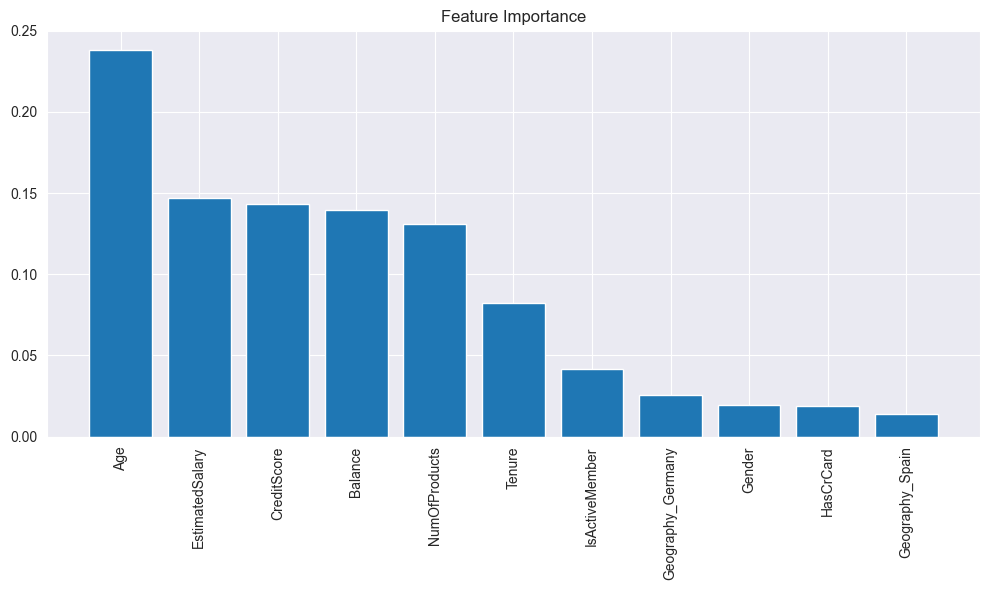

In [17]:
import matplotlib.pyplot as plt
import numpy as np

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10,6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)), features[indices], rotation=90)
plt.tight_layout()
plt.show()
